In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HG01952_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [4]:
T2T_startStopDict

{'0': ['1881158', '1914892'],
 '1': ['2503810', '2577287'],
 '2': ['2699163', '2739483'],
 '3': ['4414556', '4676068'],
 '4': ['5215999', '5331387'],
 '5': ['5918049', '6113089'],
 '6': ['6748856', '6987677'],
 '7': ['7838989', '9641476'],
 '8': ['9644105', '10041885'],
 '9': ['10449553', '10838302'],
 '10': ['11373405', '12310478'],
 '11': ['12632678', '13127535'],
 '12': ['13547339', '13736372'],
 '13': ['14245848', '14800953'],
 '14': ['15323468', '15847359'],
 '15': ['16279429', '16503995'],
 '16': ['17004097', '17107227'],
 '17': ['17976858', '18612200'],
 '18': ['18911965', '19880231'],
 '19': ['20158589', '20716390'],
 '20': ['21044665', '21841272'],
 '21': ['22249342', '22332587'],
 '22': ['22661658', '22706357'],
 '23': ['23024299', '23047400'],
 '24': ['23058173', '23078272'],
 '25': ['23088278', '23109483'],
 '26': ['23115882', '23144994']}

In [5]:
samtools='temp'
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01952_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        samtools=goodLine.split(" ")[5]
        myLines.append(goodLine)

100%|█████████████████████████████████| 20665/20665 [00:00<00:00, 406127.35it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(453468)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 27/27 [00:00<00:00, 212868.81it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG01952'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1427690,453468,1881157,HG01952
1,0,Repeat Block,33735,1881158,1914892,HG01952
2,1,Spacer Block,588917,1914893,2503809,HG01952
3,1,Repeat Block,73478,2503810,2577287,HG01952
4,2,Spacer Block,121875,2577288,2699162,HG01952
5,2,Repeat Block,40321,2699163,2739483,HG01952
6,3,Spacer Block,1675072,2739484,4414555,HG01952
7,3,Repeat Block,261513,4414556,4676068,HG01952
8,4,Spacer Block,539930,4676069,5215998,HG01952
9,4,Repeat Block,115389,5215999,5331387,HG01952


In [16]:
#Pull the sequences for the spacer blocks (This is for RepeatMasker)
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_spacerSequences_cleaned.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("0010036.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split(str(tempDF.at[row,'End']))[1])
        else:
            continue

file.close()

In [17]:
#Pull the sequences for the spacer blocks
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            #file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("0000749.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

## Load in HaeIII Restriction Data

In [3]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("HG01952:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">HG01952:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


100%|██████████████████████████████| 223967/223967 [00:00<00:00, 1006357.79it/s]


In [11]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:453468-1881157': '0',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:1914893-2503809': '1',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:2577288-2699162': '2',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:2739484-4414555': '3',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:4676069-5215998': '4',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:5331388-5918048': '5',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:6113090-6748855': '6',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:6987678-7838988': '7',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:9641477-9644104': '8',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:10041886-10449552': '9',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:10838303-11373404': '10',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:12310479-12632677': '11',
 'chrY.21-24.01.AMPL7-PAR2.FW.una

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HG01952:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HG01952:453468-1881157': '0',
 'HG01952:1914893-2503809': '1',
 'HG01952:2577288-2699162': '2',
 'HG01952:2739484-4414555': '3',
 'HG01952:4676069-5215998': '4',
 'HG01952:5331388-5918048': '5',
 'HG01952:6113090-6748855': '6',
 'HG01952:6987678-7838988': '7',
 'HG01952:9641477-9644104': '8',
 'HG01952:10041886-10449552': '9',
 'HG01952:10838303-11373404': '10',
 'HG01952:12310479-12632677': '11',
 'HG01952:13127536-13547338': '12',
 'HG01952:13736373-14245847': '13',
 'HG01952:14800954-15323467': '14',
 'HG01952:15847360-16279428': '15',
 'HG01952:16503996-17004096': '16',
 'HG01952:17107228-17976857': '17',
 'HG01952:18612201-18911964': '18',
 'HG01952:19880232-20158588': '19',
 'HG01952:20716391-21044664': '20',
 'HG01952:21841273-22249341': '21',
 'HG01952:22332588-22661657': '22',
 'HG01952:22706358-23024298': '23',
 'HG01952:23047401-23058172': '24',
 'HG01952:23078273-23088277': '25',
 'HG01952:23109484-23115881': '26'}

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 3499/3499 [00:00<00:00, 167597.81it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           0               0  165411    453469    618879
            297             0    1118    618880    619997
            266             0    2018    619998    622015
            302             0    1109    622016    623124
            265             0    2027    623125    625151
...                       ...     ...       ...       ...
23          3483           23    3501  23010072  23013572
            3484           23    3499  23013573  23017071
            3462           23    3544  23017072  23020615
            3467           23    3533  23020616  23024148
            3497           23     151  23024149  23024299

[3499 rows x 4 columns]

In [15]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01952_fragmentLengths.csv")

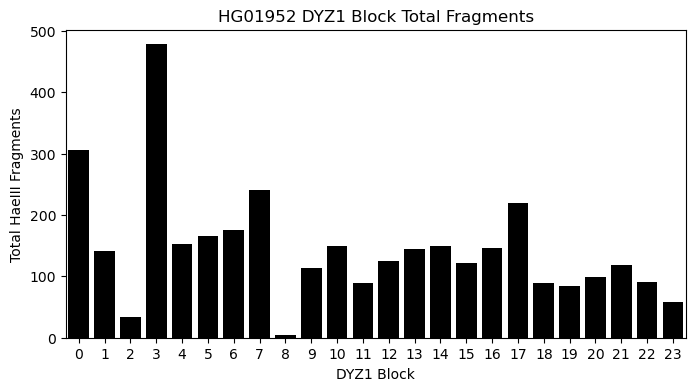

In [18]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,4
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 24:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HG01952 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01952_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<24]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<24]['Length'])))

Mean: 3689.592740783081
Median: 3554.0


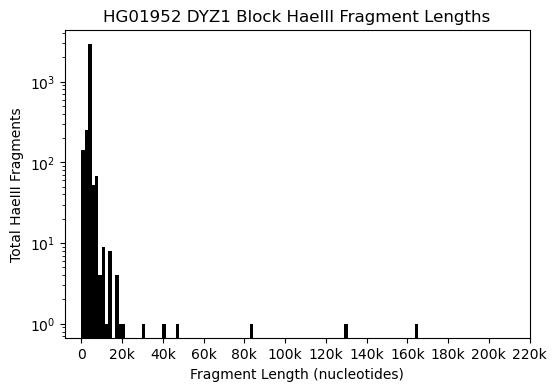

In [21]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<24]['Length'], log=True, bins=100, color='black')
plt.title("HG01952 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01952_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [19]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='HG01952:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [20]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
HG01952:453469-618879,0,165411,453469,618879
HG01952:618880-619997,0,1118,618880,619997
HG01952:619998-622015,0,2018,619998,622015
HG01952:622016-623124,0,1109,622016,623124
HG01952:623125-625151,0,2027,623125,625151
...,...,...,...,...
HG01952:23010072-23013572,23,3501,23010072,23013572
HG01952:23013573-23017071,23,3499,23013573,23017071
HG01952:23017072-23020615,23,3544,23017072,23020615


In [21]:
sampleDict = {x:'+' for x in desired_df2.index}

In [22]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 37695/37695 [00:00<00:00, 361956.23it/s]


In [23]:
sampleDict

{'HG01952:453469-618879': 'C',
 'HG01952:618880-619997': 'C',
 'HG01952:619998-622015': 'C',
 'HG01952:622016-623124': 'C',
 'HG01952:623125-625151': 'C',
 'HG01952:625152-627845': 'C',
 'HG01952:627846-630971': 'C',
 'HG01952:630972-632085': 'C',
 'HG01952:632086-634102': 'C',
 'HG01952:634103-637223': 'C',
 'HG01952:637224-638337': 'C',
 'HG01952:638338-640354': 'C',
 'HG01952:640355-643475': 'C',
 'HG01952:643476-644589': 'C',
 'HG01952:644590-646596': 'C',
 'HG01952:646597-649722': 'C',
 'HG01952:649723-650836': 'C',
 'HG01952:650837-652853': 'C',
 'HG01952:652854-657082': 'C',
 'HG01952:657083-660189': 'C',
 'HG01952:660190-700607': 'C',
 'HG01952:700608-730707': 'C',
 'HG01952:730708-749364': 'C',
 'HG01952:749365-752471': 'C',
 'HG01952:752472-882066': 'C',
 'HG01952:882067-894519': 'C',
 'HG01952:894520-897279': 'C',
 'HG01952:897280-917255': 'C',
 'HG01952:917256-920783': 'C',
 'HG01952:920784-924342': 'C',
 'HG01952:924343-927916': 'C',
 'HG01952:927917-931450': 'C',
 'HG0195

In [24]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
HG01952:453469-618879,0,165411,453469,618879,C
HG01952:618880-619997,0,1118,618880,619997,C
HG01952:619998-622015,0,2018,619998,622015,C
HG01952:622016-623124,0,1109,622016,623124,C
HG01952:623125-625151,0,2027,623125,625151,C
...,...,...,...,...,...
HG01952:23010072-23013572,23,3501,23010072,23013572,C
HG01952:23013573-23017071,23,3499,23013573,23017071,C
HG01952:23017072-23020615,23,3544,23017072,23020615,C


In [25]:
desired_df2['Color']='black'

In [26]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [27]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
HG01952:453469-618879,0,165411,453469,618879,C,red
HG01952:618880-619997,0,1118,618880,619997,C,red
HG01952:619998-622015,0,2018,619998,622015,C,red
HG01952:622016-623124,0,1109,622016,623124,C,red
HG01952:623125-625151,0,2027,623125,625151,C,red
...,...,...,...,...,...,...
HG01952:23010072-23013572,23,3501,23010072,23013572,C,red
HG01952:23013573-23017071,23,3499,23013573,23017071,C,red
HG01952:23017072-23020615,23,3544,23017072,23020615,C,red


In [28]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 3257, '+': 242})
Counter({'red': 3257, 'blue': 242})


In [29]:
#####################################################################################

In [30]:
rb_df = desired_df2.copy()

# Clusters

In [31]:
import pysam
from Bio.Seq import Seq

In [32]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
#Comment this out for all fragments
#for row in rb_df[(rb_df['Color']!='')].index:
    
# 2nd Pass BlueRows
#for row in rb_df.loc[BlackRows].index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("HG01952:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        #print(split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))))
        mySeq = (split(sequence.split("HG01952:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["HG01952:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [33]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CTGGT,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG
HG01952:453469-618879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:618880-619997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:619998-622015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:622016-623124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:623125-625151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01952:23010072-23013572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:23013573-23017071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:23017072-23020615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:23020616-23024148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 3499/3499 [00:08<00:00, 423.76it/s]


,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CTGGT,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG
HG01952:453469-618879,57,7,124,1,0,73,68,221,2,6,...,0,129,110,0,9,1,0,1,1,1
HG01952:618880-619997,1,0,0,0,0,1,1,1,0,0,...,0,3,1,0,0,0,0,0,0,0
HG01952:619998-622015,0,0,2,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01952:622016-623124,1,0,0,0,0,1,1,1,0,0,...,0,3,1,0,0,1,0,0,0,0
HG01952:623125-625151,0,0,2,0,0,0,0,4,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01952:23010072-23013572,0,1,1,1,0,2,1,4,0,0,...,2,3,1,2,0,2,0,0,1,0
HG01952:23013573-23017071,0,1,1,1,0,3,1,4,0,0,...,1,3,2,1,0,2,0,0,1,0
HG01952:23017072-23020615,0,1,1,1,0,3,1,5,0,0,...,1,2,1,1,0,2,0,0,1,0
HG01952:23020616-23024148,0,1,1,1,0,3,1,5,0,0,...,1,4,2,1,0,2,0,0,1,0


In [35]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [36]:
import composition_stats as cs

In [37]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [38]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CTGGT,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG
HG01952:453469-618879,0.000345,0.000042,0.000750,0.000006,0.0,0.000441,0.000411,0.001336,0.000012,0.000036,...,0.000000,0.000780,0.000665,0.000000,0.000054,0.000006,0.0,0.000006,0.000006,0.000006
HG01952:618880-619997,0.000898,0.000000,0.000000,0.000000,0.0,0.000898,0.000898,0.000898,0.000000,0.000000,...,0.000000,0.002693,0.000898,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
HG01952:619998-622015,0.000000,0.000000,0.000993,0.000000,0.0,0.000000,0.000000,0.001490,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
HG01952:622016-623124,0.000905,0.000000,0.000000,0.000000,0.0,0.000905,0.000905,0.000905,0.000000,0.000000,...,0.000000,0.002715,0.000905,0.000000,0.000000,0.000905,0.0,0.000000,0.000000,0.000000
HG01952:623125-625151,0.000000,0.000000,0.000989,0.000000,0.0,0.000000,0.000000,0.001977,0.000000,0.000000,...,0.000000,0.000000,0.000494,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01952:23010072-23013572,0.000000,0.000286,0.000286,0.000286,0.0,0.000572,0.000286,0.001144,0.000000,0.000000,...,0.000572,0.000858,0.000286,0.000572,0.000000,0.000572,0.0,0.000000,0.000286,0.000000
HG01952:23013573-23017071,0.000000,0.000286,0.000286,0.000286,0.0,0.000858,0.000286,0.001144,0.000000,0.000000,...,0.000286,0.000858,0.000572,0.000286,0.000000,0.000572,0.0,0.000000,0.000286,0.000000
HG01952:23017072-23020615,0.000000,0.000282,0.000282,0.000282,0.0,0.000847,0.000282,0.001412,0.000000,0.000000,...,0.000282,0.000565,0.000282,0.000282,0.000000,0.000565,0.0,0.000000,0.000282,0.000000
HG01952:23020616-23024148,0.000000,0.000283,0.000283,0.000283,0.0,0.000850,0.000283,0.001417,0.000000,0.000000,...,0.000283,0.001133,0.000567,0.000283,0.000000,0.000567,0.0,0.000000,0.000283,0.000000


In [39]:
CLR_KMER = clrTransformation(abundanceKmer)

In [40]:
CLR_KMER.index.name ='SampleName'

In [41]:
for row in rb_df.index:
    if 'HG01952:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['HG01952:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
HG01952:453469-618879,5.182682,3.085541,5.959912,1.139631,-9.870056,5.430090,5.359139,6.537794,1.832778,2.931390,...,5.999443,5.840111,-9.870056,3.336855,1.139631,-9.870056,1.139631,1.139631,1.139631,red
HG01952:618880-619997,10.901329,-5.108810,-5.108810,-5.108810,-5.108810,10.901329,10.901329,10.901329,-5.108810,-5.108810,...,11.999941,10.901329,-5.108810,-5.108810,-5.108810,-5.108810,-5.108810,-5.108810,-5.108810,red
HG01952:619998-622015,-5.861861,-5.861861,10.249259,-5.861861,-5.861861,-5.861861,-5.861861,10.654724,-5.861861,-5.861861,...,-5.861861,-5.861861,-5.861861,-5.861861,-5.861861,-5.861861,-5.861861,-5.861861,-5.861861,red
HG01952:622016-623124,10.781220,-5.237030,-5.237030,-5.237030,-5.237030,10.781220,10.781220,10.781220,-5.237030,-5.237030,...,11.879832,10.781220,-5.237030,-5.237030,10.781220,-5.237030,-5.237030,-5.237030,-5.237030,red
HG01952:623125-625151,-5.772128,-5.772128,10.334533,-5.772128,-5.772128,-5.772128,-5.772128,11.027681,-5.772128,-5.772128,...,-5.772128,9.641386,-5.772128,-5.772128,-5.772128,-5.772128,-5.772128,-5.772128,-5.772128,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01952:23010072-23013572,-7.226941,7.639249,7.639249,7.639249,-7.226941,8.332397,7.639249,9.025544,-7.226941,-7.226941,...,8.737862,7.639249,8.332397,-7.226941,8.332397,-7.226941,-7.226941,7.639249,-7.226941,red
HG01952:23013573-23017071,-7.158625,7.708138,7.708138,7.708138,-7.158625,8.806750,7.708138,9.094432,-7.158625,-7.158625,...,8.806750,8.401285,7.708138,-7.158625,8.401285,-7.158625,-7.158625,7.708138,-7.158625,red
HG01952:23017072-23020615,-7.363975,7.489994,7.489994,7.489994,-7.363975,8.588607,7.489994,9.099432,-7.363975,-7.363975,...,8.183142,7.489994,7.489994,-7.363975,8.183142,-7.363975,-7.363975,7.489994,-7.363975,red


In [42]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [43]:
##################### Bray-Curtis distance ##################

In [44]:
from scipy.spatial import distance

In [45]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['HG01952:453469-618879',
 'HG01952:618880-619997',
 'HG01952:619998-622015',
 'HG01952:622016-623124',
 'HG01952:623125-625151',
 'HG01952:625152-627845',
 'HG01952:627846-630971',
 'HG01952:630972-632085',
 'HG01952:632086-634102',
 'HG01952:634103-637223',
 'HG01952:637224-638337',
 'HG01952:638338-640354',
 'HG01952:640355-643475',
 'HG01952:643476-644589',
 'HG01952:644590-646596',
 'HG01952:646597-649722',
 'HG01952:649723-650836',
 'HG01952:650837-652853',
 'HG01952:652854-657082',
 'HG01952:657083-660189',
 'HG01952:660190-700607',
 'HG01952:700608-730707',
 'HG01952:730708-749364',
 'HG01952:749365-752471',
 'HG01952:752472-882066',
 'HG01952:882067-894519',
 'HG01952:894520-897279',
 'HG01952:897280-917255',
 'HG01952:917256-920783',
 'HG01952:920784-924342',
 'HG01952:924343-927916',
 'HG01952:927917-931450',
 'HG01952:931451-935024',
 'HG01952:935025-938553',
 'HG01952:938554-942127',
 'HG01952:942128-945701',
 'HG01952:945702-949235',
 'HG01952:949236-952815',
 'HG01952:95

In [46]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['HG01952:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'HG01952:453469-618879': 'C',
 'HG01952:618880-619997': 'C',
 'HG01952:619998-622015': 'C',
 'HG01952:622016-623124': 'C',
 'HG01952:623125-625151': 'C',
 'HG01952:625152-627845': 'C',
 'HG01952:627846-630971': 'C',
 'HG01952:630972-632085': 'C',
 'HG01952:632086-634102': 'C',
 'HG01952:634103-637223': 'C',
 'HG01952:637224-638337': 'C',
 'HG01952:638338-640354': 'C',
 'HG01952:640355-643475': 'C',
 'HG01952:643476-644589': 'C',
 'HG01952:644590-646596': 'C',
 'HG01952:646597-649722': 'C',
 'HG01952:649723-650836': 'C',
 'HG01952:650837-652853': 'C',
 'HG01952:652854-657082': 'C',
 'HG01952:657083-660189': 'C',
 'HG01952:660190-700607': 'C',
 'HG01952:700608-730707': 'C',
 'HG01952:730708-749364': 'C',
 'HG01952:749365-752471': 'C',
 'HG01952:752472-882066': 'C',
 'HG01952:882067-894519': 'C',
 'HG01952:894520-897279': 'C',
 'HG01952:897280-917255': 'C',
 'HG01952:917256-920783': 'C',
 'HG01952:920784-924342': 'C',
 'HG01952:924343-927916': 'C',
 'HG01952:927917-931450': 'C',
 'HG0195

In [47]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 285.31it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 344.40it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 294.65it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 374.51it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 354.13it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 352.42it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 311.93it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 339.02it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 296.85it/s]


,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CTGGT,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG
Yqhet_3k1bp,0.000321,0.000000,0.000963,0.000000,0.0,0.000321,0.000321,0.001605,0.0,0.0,...,0.000000,0.000963,0.000321,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
DYZ18_Yq,0.000350,0.000000,0.000699,0.000000,0.0,0.000350,0.000350,0.001399,0.0,0.0,...,0.000000,0.001049,0.000699,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
DYZ1_Yq,0.000000,0.000281,0.000281,0.000281,0.0,0.000842,0.000000,0.000842,0.0,0.0,...,0.000281,0.000842,0.000281,0.000561,0.000000,0.000561,0.0,0.0,0.000561,0.0
Yqhet_2k7bp,0.000362,0.000000,0.000362,0.000362,0.0,0.000725,0.000362,0.001449,0.0,0.0,...,0.000000,0.000725,0.000725,0.000000,0.000362,0.000000,0.0,0.0,0.000000,0.0


In [48]:
ConkmerDF

,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CTGGT,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG
Yqhet_3k1bp,1,0,3,0,0,1,1,5,0,0,...,0,3,1,0,0,0,0,0,0,0
DYZ18_Yq,1,0,2,0,0,1,1,4,0,0,...,0,3,2,0,0,0,0,0,0,0
DYZ1_Yq,0,1,1,1,0,3,0,3,0,0,...,1,3,1,2,0,2,0,0,2,0
Yqhet_2k7bp,1,0,1,1,0,2,1,4,0,0,...,0,2,2,0,1,0,0,0,0,0


In [49]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [50]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [51]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,AGTGG,GGAGT,TGGAG,...,GCTCC,ACCGC,ATCCG,CCAAC,ACGTC,CGGCA,CGAGA,CGACG,AGCTA,CTCTG
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,105,109,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,8,14,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,27,29,33,...,0,0,0,0,0,0,0,0,0,0


In [52]:
abundanceConsensus

,GACTT,GATCA,ATTTA,CCTTG,GGACG,CATCA,GCAAC,AACTG,TGTCT,CCGGG,...,CTGGT,CAAAC,GTATT,CACTC,GGGTC,GCTGG,GCGCG,CTTAA,TGCTA,CTCTG
Yqhet_3k1bp,0.000321,0.000000,0.000963,0.000000,0.0,0.000321,0.000321,0.001605,0.0,0.0,...,0.000000,0.000963,0.000321,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
DYZ18_Yq,0.000350,0.000000,0.000699,0.000000,0.0,0.000350,0.000350,0.001399,0.0,0.0,...,0.000000,0.001049,0.000699,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
DYZ1_Yq,0.000000,0.000281,0.000281,0.000281,0.0,0.000842,0.000000,0.000842,0.0,0.0,...,0.000281,0.000842,0.000281,0.000561,0.000000,0.000561,0.0,0.0,0.000561,0.0
Yqhet_2k7bp,0.000362,0.000000,0.000362,0.000362,0.0,0.000725,0.000362,0.001449,0.0,0.0,...,0.000000,0.000725,0.000725,0.000000,0.000362,0.000000,0.0,0.0,0.000000,0.0


In [53]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [54]:
print(len(kmerDF))

3499


In [55]:
myDict
myGoodDict = myDict.copy()

In [56]:
myGoodDict

{'HG01952:453469-618879': {'Yqhet_3k1bp': 0.9060604485296986,
  'DYZ18_Yq': 0.9469767812821613,
  'DYZ1_Yq': 0.6121243505681014,
  'Yqhet_2k7bp': 0.6736797366671213},
 'HG01952:618880-619997': {'Yqhet_3k1bp': 0.8135574952955382,
  'DYZ18_Yq': 0.7999152553012517,
  'DYZ1_Yq': 0.5154730939389285,
  'Yqhet_2k7bp': 0.5671733926573517},
 'HG01952:619998-622015': {'Yqhet_3k1bp': 0.8835029592212458,
  'DYZ18_Yq': 0.8509812431858113,
  'DYZ1_Yq': 0.641007059977075,
  'Yqhet_2k7bp': 0.6992739231178849},
 'HG01952:622016-623124': {'Yqhet_3k1bp': 0.8136763434846713,
  'DYZ18_Yq': 0.7991772932949404,
  'DYZ1_Yq': 0.5197908271087052,
  'Yqhet_2k7bp': 0.5712686077775592},
 'HG01952:623125-625151': {'Yqhet_3k1bp': 0.8866562619760396,
  'DYZ18_Yq': 0.8536522301228183,
  'DYZ1_Yq': 0.6438873016412241,
  'Yqhet_2k7bp': 0.7023093124717916},
 'HG01952:625152-627845': {'Yqhet_3k1bp': 0.9501852769009529,
  'DYZ18_Yq': 0.8968310499909012,
  'DYZ1_Yq': 0.6036262298158991,
  'Yqhet_2k7bp': 0.6656416680135768},

In [58]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/HG01952_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [59]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

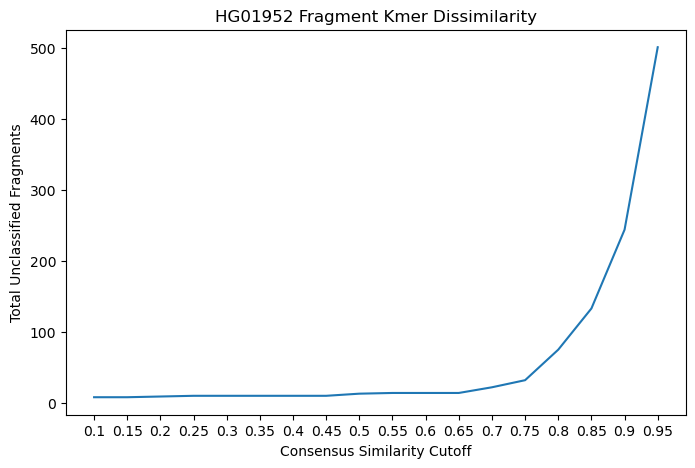

In [62]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HG01952 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01952_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [63]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01952/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(row.split("HG01952:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(row.split("HG01952:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(row.split("HG01952:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [64]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'HG01952:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01952:453469-618879,0,165411,453469,618879,C,red
HG01952:618880-619997,0,1118,618880,619997,C,red
HG01952:619998-622015,0,2018,619998,622015,C,red
HG01952:622016-623124,0,1109,622016,623124,C,red
HG01952:623125-625151,0,2027,623125,625151,C,red
...,...,...,...,...,...,...
HG01952:23010072-23013572,23,3501,23010072,23013572,C,red
HG01952:23013573-23017071,23,3499,23013573,23017071,C,red
HG01952:23017072-23020615,23,3544,23017072,23020615,C,red


In [65]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01952/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01952/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                if 'Other' in name:
                    rb_df.at[str(line.split("0010036.")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split("0010036.")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split("0010036.")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split("0010036.")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split("0010036.")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|███████████████████████████████████████| 44/44 [00:00<00:00, 101680.10it/s]


Other_14.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 66052.03it/s]


Other_2.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 38130.04it/s]


Other_0.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 34952.53it/s]


Other_9.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 39945.75it/s]


Other_11.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 42153.81it/s]


Other_1.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 28926.23it/s]


Other_8.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 30727.50it/s]


Other_3.fasta


100%|███████████████████████████████████████| 52/52 [00:00<00:00, 358723.37it/s]


Yqhet_3k1bp_0.fasta


100%|███████████████████████████████████| 2050/2050 [00:00<00:00, 699505.63it/s]


DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 2758/2758 [00:00<00:00, 720606.14it/s]


Other_6.fasta


100%|███████████████████████████████████████| 95/95 [00:00<00:00, 321337.81it/s]


Other_12.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 45221.61it/s]


Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 2751/2751 [00:00<00:00, 725328.78it/s]


Other_13.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 22610.80it/s]


Yqhet_3k1bp_1.fasta


100%|█████████████████████████████████████| 210/210 [00:00<00:00, 523664.59it/s]


Other_10.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 24105.20it/s]


DYZ1_Yq_0.fasta


100%|██████████████████████████████| 197169/197169 [00:00<00:00, 1059731.26it/s]


Other_7.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 29382.16it/s]


DYZ1_Yq_1.fasta


100%|███████████████████████████████████████| 44/44 [00:00<00:00, 338622.71it/s]


Other_5.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 63072.24it/s]


In [ ]:
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))


In [66]:
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01952:453469-618879,0,165411,453469,618879,C,grey
HG01952:618880-619997,0,1118,618880,619997,C,red
HG01952:619998-622015,0,2018,619998,622015,C,red
HG01952:622016-623124,0,1109,622016,623124,C,red
HG01952:623125-625151,0,2027,623125,625151,C,red
...,...,...,...,...,...,...
HG01952:23010072-23013572,23,3501,23010072,23013572,C,black
HG01952:23013573-23017071,23,3499,23013573,23017071,C,black
HG01952:23017072-23020615,23,3544,23017072,23020615,C,black


In [67]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036."+str(row)))
    file.close()
        

In [68]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0010036.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████| 212361/212361 [00:00<00:00, 955050.24it/s]


In [69]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0010036.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2758/2758 [00:00<00:00, 561957.27it/s]


In [70]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0010036.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2751/2751 [00:00<00:00, 484710.37it/s]


In [71]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0010036.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2260/2260 [00:00<00:00, 513829.52it/s]


In [72]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/DYZ1_dataframe.csv")

In [4]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01952:453469-618879,0,165411,453469,618879,C,grey
HG01952:618880-619997,0,1118,618880,619997,C,red
HG01952:619998-622015,0,2018,619998,622015,C,red
HG01952:622016-623124,0,1109,622016,623124,C,red
HG01952:623125-625151,0,2027,623125,625151,C,red
...,...,...,...,...,...,...
HG01952:23010072-23013572,23,3501,23010072,23013572,C,black
HG01952:23013573-23017071,23,3499,23013573,23017071,C,black
HG01952:23017072-23020615,23,3544,23017072,23020615,C,black


In [5]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 453469, 'End': 1881158},
 1: {'Start': 1914894, 'End': 2503810},
 2: {'Start': 2577289, 'End': 2699163},
 3: {'Start': 2739485, 'End': 4414556},
 4: {'Start': 4676070, 'End': 5215999},
 5: {'Start': 5331389, 'End': 5918049},
 6: {'Start': 6113091, 'End': 6748856},
 7: {'Start': 6987679, 'End': 7838989},
 8: {'Start': 9641478, 'End': 9644105},
 9: {'Start': 10041887, 'End': 10449553},
 10: {'Start': 10838304, 'End': 11373405},
 11: {'Start': 12310480, 'End': 12632678},
 12: {'Start': 13127537, 'End': 13547339},
 13: {'Start': 13736374, 'End': 14245848},
 14: {'Start': 14800955, 'End': 15323468},
 15: {'Start': 15847361, 'End': 16279429},
 16: {'Start': 16503997, 'End': 17004097},
 17: {'Start': 17107229, 'End': 17976858},
 18: {'Start': 18612202, 'End': 18911965},
 19: {'Start': 19880233, 'End': 20158589},
 20: {'Start': 20716392, 'End': 21044665},
 21: {'Start': 21841274, 'End': 22249342},
 22: {'Start': 22332589, 'End': 22661658},
 23: {'Start': 22706359, 'End': 23024299

In [22]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(803829)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+Start+"-"+End))
        file.close()

In [23]:
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/"):
    for name in filenames:
        print(name)
        
        if 'HMMER' in name or 'cleaned' in name:
            continue
        else:
        
            file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/'+name, 'r')
            Lines = file1.readlines()

            with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/'+name.split(".")[0]+'_cleaned.fasta', 'a+') as file2:
                for line in tqdm(Lines):
                    if ">" in line:
                        print(line)
                        file2.write(">"+str(line.split("0010036.")[1]))
                    else:
                        file2.write(line)
            file2.close()


            file1.close()


red_block.fasta


100%|███████████████████████████████████| 3084/3084 [00:00<00:00, 522192.63it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:618880-803829

grey_block.fasta


100%|███████████████████████████████████| 2758/2758 [00:00<00:00, 523552.41it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:453469-618879

black_block.fasta


 27%|████████▋                       | 56180/207473 [00:00<00:00, 561756.34it/s]

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:917256-1881158

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:1914894-2503810

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:2577289-2699163

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:2739485-4414556

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:4676070-5215999

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:5331389-5918049

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:6113091-6748856

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:6987679-7838989

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:9641478-9644105

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:10041887-10449553

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:10838304-11373405

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:12310480-12632678

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:13127537-13547339

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010

 77%|███████████████████████▉       | 159914/207473 [00:00<00:00, 841473.45it/s]

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:15847361-16279429

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:16503997-17004097



100%|███████████████████████████████| 207473/207473 [00:00<00:00, 941210.71it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:17107229-17976858

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:18612202-18911965

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:19880233-20158589

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:20716392-21044665

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:21841274-22249342

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:22332589-22661658

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:22706359-23024299

cyan_block.fasta


100%|███████████████████████████████████| 2748/2748 [00:00<00:00, 579776.03it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:752472-917255

red_block_cleaned.fasta
black_block_cleaned.fasta
runHMMER2.sh
DYZ18_hmmer.tsv


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/DYZ18_hmmer.tsv'

In [24]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [25]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [26]:
DYZ18_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/HMMER/DYZ18_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
19,HG01952:453469-618879,4,2864,2,2852,C,0.0,2465.8,2850
34,HG01952:453469-618879,2,2864,2854,5696,C,0.0,2445.9,2842
50,HG01952:453469-618879,2,2864,5698,8544,C,0.0,2408.0,2846
41,HG01952:453469-618879,2,2864,8546,11392,C,0.0,2440.3,2846
0,HG01952:453469-618879,2,2864,11394,14256,C,0.0,2513.7,2862
7,HG01952:453469-618879,2,2864,14258,17123,C,0.0,2480.5,2865
3,HG01952:453469-618879,2,2864,17125,19991,C,0.0,2495.4,2866
2,HG01952:453469-618879,2,2864,19993,22859,C,0.0,2497.4,2866
1,HG01952:453469-618879,2,2864,22861,25732,C,0.0,2505.3,2871
12,HG01952:453469-618879,2,2864,25734,28600,C,0.0,2471.6,2866


In [27]:
DYZ1_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/HMMER/DYZ1_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
2863,HG01952:917256-1881158,1,3569,1,3528,C,0.0,3053.2,3527
3347,HG01952:22332589-22661658,500,3569,2,3052,+,0.0,2687.0,3050
3214,HG01952:1914894-2503810,1,3569,159,3716,+,0.0,2921.6,3557
3501,HG01952:2739485-4414556,1,2114,894,2887,C,0.0,1626.0,1993
3545,HG01952:21841274-22249342,392,2116,898,2532,C,0.0,1326.2,1634
...,...,...,...,...,...,...,...,...,...
1681,HG01952:2739485-4414556,1,3569,1657870,1661418,C,0.0,3110.7,3548
1136,HG01952:2739485-4414556,1,3569,1661419,1664977,C,0.0,3123.3,3558
2943,HG01952:2739485-4414556,1,3569,1664978,1668481,C,0.0,3041.5,3503
2179,HG01952:2739485-4414556,1,3569,1668482,1672010,C,0.0,3092.4,3528


In [28]:
k3_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/HMMER/Yq_3kbp_hmmer_extra.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
43,HG01952:618880-803829,606,3119,1726,4223,C,0.0,2221.8,2497
2,HG01952:618880-803829,2,3119,4223,7364,C,0.0,2768.8,3141
51,HG01952:618880-803829,1229,3119,8169,10058,C,0.0,1692.0,1889
7,HG01952:618880-803829,2,3119,10058,13184,C,0.0,2753.7,3126
1,HG01952:618880-803829,2,3119,13184,16315,C,0.0,2773.6,3131
5,HG01952:618880-803829,2,3119,16315,19436,C,0.0,2759.8,3121
3,HG01952:618880-803829,2,3119,19436,22567,C,0.0,2766.0,3131
6,HG01952:618880-803829,2,3119,22567,25688,C,0.0,2759.8,3121
11,HG01952:618880-803829,2,3119,25688,28809,C,0.0,2745.2,3121
8,HG01952:618880-803829,2,3119,28809,31935,C,0.0,2753.4,3126


In [29]:
k2_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
41,HG01952:752472-917255,2,1312,51357,52657,C,0.0,1035.2,1300
40,HG01952:752472-917255,1271,2766,52646,54146,C,0.0,1317.1,1500
17,HG01952:752472-917255,2,2766,54146,56905,C,0.0,2477.3,2759
13,HG01952:752472-917255,2,2766,56905,59659,C,0.0,2485.2,2754
14,HG01952:752472-917255,2,2766,59659,62428,C,0.0,2480.7,2769
0,HG01952:752472-917255,2,2766,62428,65192,C,0.0,2513.3,2764
20,HG01952:752472-917255,2,2766,65192,67945,C,0.0,2471.4,2753
8,HG01952:752472-917255,2,2766,67945,70709,C,0.0,2496.4,2764
36,HG01952:752472-917255,2,2352,70709,73049,C,0.0,2117.5,2340
38,HG01952:752472-917255,2,2358,73488,75809,C,0.0,2084.9,2321


In [30]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [31]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [32]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [33]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [34]:
finalDF.reset_index(inplace=True)

In [35]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [3]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [20]:
finalDF[finalDF['SpacerBlock']==0].iloc[[100]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
100,41,HG01952:618880-752471,C,2025,750447,752472,red,0


In [21]:
finalDF[finalDF['SpacerBlock']==0].iloc[[101]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
101,41,HG01952:752472-917255,C,1300,803829,805129,cyan,0


In [36]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) < 0 or int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 10000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-11
115


0
-15
191


0
-16
192


0
-15
193


0
-14
194


0
-14
196


0
-9
197


0
-11
200


0
-15
207


0
-15
208


0
-14
210


0
-9
211


0
-12
217


0
-15
218


0
-15
219


0
-14
221


0
-9
222


0
-25
437


1
-19
29


1
-28
30


1
-20
31


1
-13
32


1
-13
33


1
-13
34


1
-13
35


1
-14
36


1
-19
37


1
-14
38


1
-21
39


1
-22
40


1
-21
41


1
-20
42


1
-15
43


1
-15
44


1
-14
45


1
-13
46


1
-11
76


1
-11
83


1
-11
87


1
-11
99


1
-11
110


3
-31
12


3
-31
15


3
-30
83


3
-13
127


3
-23
130


3
-22
148


3
-27
206


3
-26
207


3
-9
244


3
-18
265


3
-8
287


3
-15
302


3
-18
456


3
-25
458


3
-24
465


4
-17
0


4
-13
3


4
-25
9


4
-19
76


4
-6
149


5
-18
0


5
-13
5


5
-19
100


5
-35
152


6
-26
0


6
-25
109


6
-26
111


6
-25
112


6
-25
115


6
-25
127


6
-16
168


7
-29
0


9
-20
0


10
-27
0


10
-8
63


10
-17
64


10
-22
87


10
-25
116


11
-26
0


11
-20
26


12
-21
40


12
-8
43


13
-28
0


13
-12
102


14
-29
0


14
-16
135


15
-8
3

In [37]:
print(len(overlaps))

115


(array([ 1.,  1.,  2.,  3.,  5.,  7., 15.,  5.,  3., 10.,  8.,  6., 17.,
        13.,  7.,  5.,  4.,  1.,  0.,  2.]),
 array([-35.  , -33.35, -31.7 , -30.05, -28.4 , -26.75, -25.1 , -23.45,
        -21.8 , -20.15, -18.5 , -16.85, -15.2 , -13.55, -11.9 , -10.25,
         -8.6 ,  -6.95,  -5.3 ,  -3.65,  -2.  ]),
 <BarContainer object of 20 artists>)

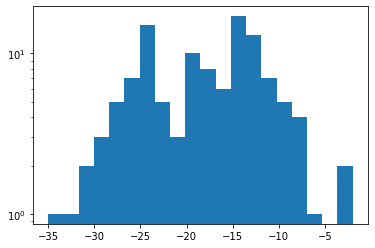

In [38]:
plt.hist(overlaps, log=True, bins=20)

3899
-35


(array([3.629e+03, 2.500e+01, 2.600e+01, 7.000e+00, 7.000e+00, 1.400e+01,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ -35. ,  161.7,  358.4,  555.1,  751.8,  948.5, 1145.2, 1341.9,
        1538.6, 1735.3, 1932. , 2128.7, 2325.4, 2522.1, 2718.8, 2915.5,
        3112.2, 3308.9, 3505.6, 3702.3, 3899. ]),
 <BarContainer object of 20 artists>)

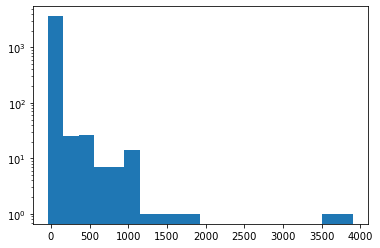

In [39]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [40]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

In [152]:
rb_df[rb_df['Color']=='lime']

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
325,0,HG01952:1483477-1483520,+,44,1483477,1483520,lime,0
451,1,HG01952:1914894-1915053,+,160,1914894,1915053,lime,1
477,2,HG01952:2003750-2004144,+,395,2003750,2004144,lime,1
628,3,HG01952:2500927-2503810,+,2884,2500927,2503810,lime,1
629,4,HG01952:2577289-2579817,C,2529,2577289,2579817,lime,2
664,5,HG01952:2739485-2742371,C,2887,2739485,2742371,lime,3
673,6,HG01952:2769465-2769599,C,135,2769465,2769599,lime,3
783,7,HG01952:3134297-3134585,C,289,3134297,3134585,lime,3
821,8,HG01952:3259991-3260310,C,320,3259991,3260310,lime,3
827,9,HG01952:3277698-3278017,C,320,3277698,3278017,lime,3


# Export and update

In [116]:
rb_df[(rb_df['SpacerBlock']==0) & (rb_df['Color']=='black')]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
156,2761,HG01952:917256-920783,+,3527,917257,920784,black,0
157,2550,HG01952:920784-924342,+,3558,920785,924343,black,0
158,2011,HG01952:924343-927916,+,3573,924344,927917,black,0
159,2339,HG01952:927917-931450,+,3533,927918,931451,black,0
160,2249,HG01952:931451-935024,+,3573,931452,935025,black,0
...,...,...,...,...,...,...,...,...
446,2809,HG01952:1863149-1866682,+,3533,1863150,1866683,black,0
447,2794,HG01952:1866683-1870221,+,3538,1866684,1870222,black,0
448,2474,HG01952:1870222-1873785,+,3563,1870223,1873786,black,0
449,3148,HG01952:1874731-1878864,+,3240,1875625,1878865,black,0


In [128]:
tempDF.at[0,'Start']=917257
tempDF.at[0,'Length']= (1881157-917257)
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,963900,917257,1881157,HG01952
1,0,Repeat Block,33735,1881158,1914892,HG01952
2,1,Spacer Block,588917,1914893,2503809,HG01952
3,1,Repeat Block,73478,2503810,2577287,HG01952
4,2,Spacer Block,121875,2577288,2699162,HG01952
5,2,Repeat Block,40321,2699163,2739483,HG01952
6,3,Spacer Block,1675072,2739484,4414555,HG01952
7,3,Repeat Block,261513,4414556,4676068,HG01952
8,4,Spacer Block,539930,4676069,5215998,HG01952
9,4,Repeat Block,115389,5215999,5331387,HG01952


In [41]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Finalized_Fragmentdf.csv")

In [129]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv")

## Visualize

In [43]:
import turtle

In [44]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01952 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 23/23 [07:10<00:00, 18.70s/it]


In [45]:
from PIL import Image

In [46]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [47]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01952/HG01952_YqHeterochromatin_DYZ1_HMMER_Finalized")

In [48]:
turtle.bye()